#### Importing the required python Libraries



In [85]:
#IMPORT NECESSARY LIBRARIES
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#### Mounting the Drive

In [86]:
from google.colab import drive 
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


#### Reading csv file

In [87]:
bike = pd.read_csv("/content/gdrive/My Drive/MS/day.csv", encoding = "ISO-8859-1", low_memory=False)
#bike = pd.read_csv("day.csv", encoding = "ISO-8859-1", low_memory=False)

#####Lets see the shape and few rows of dataframe `bike` to get the idea of the data we have

In [88]:
bike.shape

(730, 16)

In [89]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [90]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [91]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Cleaning

In [92]:
#checking for null values
print(bike.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### From the given data we can see that **`instant`** is an index column so we drop it
##### we can see column **`dteday`** and **`yr`** **`month`** are having same data so we can drop `dteday`.
##### **`cnt`**: count of total rental bikes including both casual and registered. we know that `casual+registered`=`cnt` and `cnt` is our target variable so we will not consider casual and registered, dropping off these columns.


In [93]:
columns_to_remove = ['instant', 'dteday','casual','registered']
bike = bike.drop(columns_to_remove, axis=1)

In [94]:
bike.shape

(730, 12)

##### we can see that the columns `season`,`yr`,`mnth`,`holiday`,`weekday`,`workingday`,`weathersit` all are categorical variables. We will replace *season*,*mnth*,*weekday* and *weathersit* with appropriate values given in data dictionary.

#### season : season (1:spring, 2:summer, 3:fall, 4:winter)
#### weekday : day of the week(Starts From 0:Tuesday)
#### weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [95]:
bike['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bike['weekday'].replace({0:"Tuesday",1:"Wednesday",2:"Thursday",3:"Friday",4:"Saturday",5:"Sunday",6:"Monday"},inplace=True)
bike['weathersit'].replace({1:'Clear_Few Clouds',2:'Mist_Broken Cloudy',3:'Light Snow_Light Rain_Thunderstorm',4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [96]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Mist_Broken Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Mist_Broken Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [97]:
bike_clean = bike
bike_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Mist_Broken Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Mist_Broken Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


# Exploratory Data Analysis (EDA)

#### Let's visualise the pattern of demand (target variable - 'cnt') over period of two years


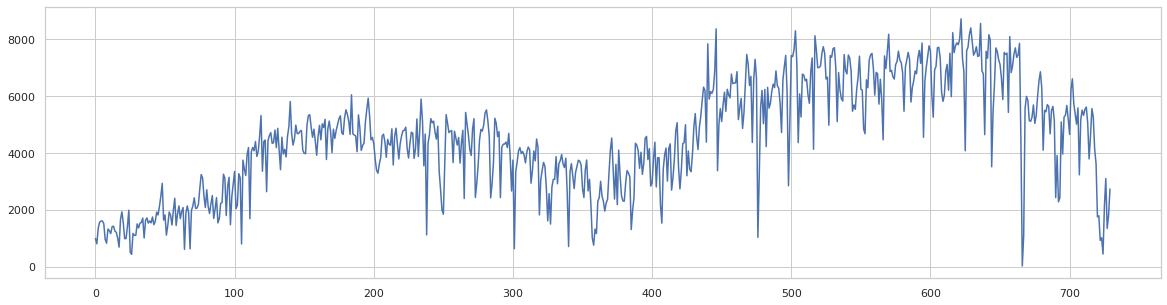

In [98]:
plt.figure(figsize=(20,5))
plt.plot(bike_clean.cnt)
plt.show()

We can see that there was growth over the period and recently we could see there is reduction in demand

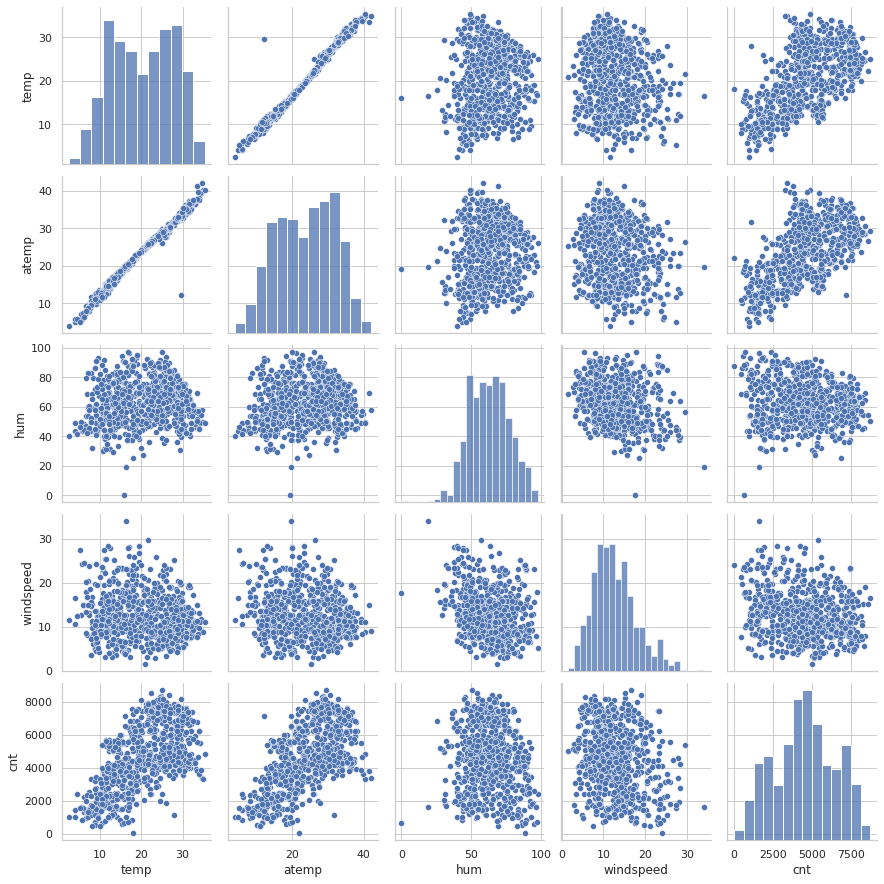

In [99]:
sns.pairplot(bike_clean, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

##### From the above pair plot we can see that the `temp` and `atemp` have a relationship
#### And also we could observe that, `temp` and `atemp` have positive correlation with target variable `cnt`.
##### let check the correlation using heatmap

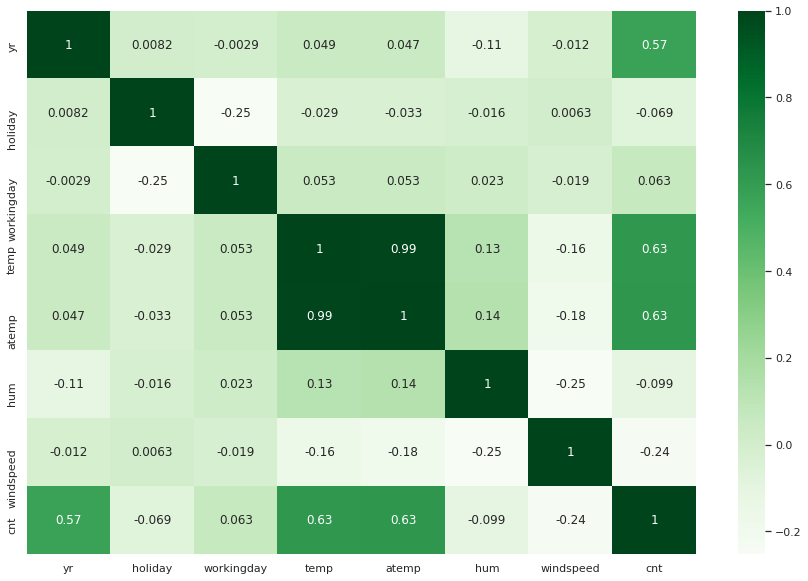

In [100]:
plt.figure(figsize = (15, 10))
sns.heatmap(bike_clean.corr(), annot = True, cmap="Greens")
plt.show()

##### We can see the correlation between `temp` and `atemp` is 0.99 which is almost 1
##### A positive correalation observed between `cnt` and `atemp` (0.63)
##### So, we can drop `temp` and consider `atemp`

In [101]:
bike_clean.drop(['temp'],axis=1,inplace=True)
bike_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Mist_Broken Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Mist_Broken Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


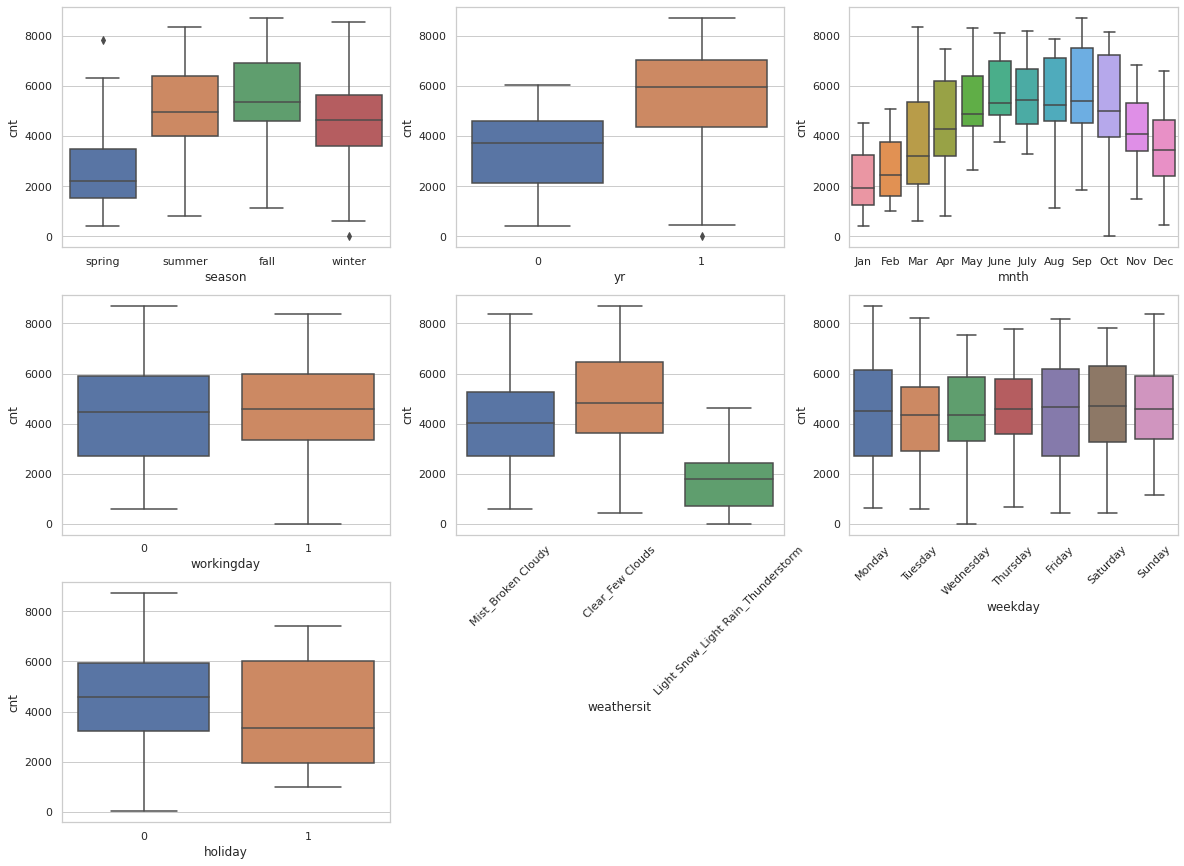

In [102]:
## Visualising categorical Variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_clean)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_clean)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_clean)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_clean)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_clean)
plt.xticks(rotation=45, horizontalalignment="center")
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_clean)
plt.xticks(rotation=45, horizontalalignment="center")
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_clean)
plt.show()

## Creating dummy variables

In [103]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [104]:
season_con=pd.get_dummies(bike_clean['season'],drop_first=True)
weather_con=pd.get_dummies(bike_clean['weathersit'],drop_first=True)
day=pd.get_dummies(bike_clean['weekday'],drop_first=True)
month=pd.get_dummies(bike_clean['mnth'],drop_first=True)

In [105]:
bike_clean=pd.concat([bike_clean,season_con],axis=1)
bike_clean=pd.concat([bike_clean,weather_con],axis=1)
bike_clean=pd.concat([bike_clean,day],axis=1)
bike_clean=pd.concat([bike_clean,month],axis=1)
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [106]:
## Dropping the columns season,mnth,weekday,weathersit

bike_clean.drop(['season'],axis=1,inplace=True)
bike_clean.drop(['weathersit'],axis=1,inplace=True)
bike_clean.drop(['weekday'],axis=1,inplace=True)
bike_clean.drop(['mnth'],axis=1,inplace=True)
bike_clean.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   atemp                               730 non-null    float64
 4   hum                                 730 non-null    float64
 5   windspeed                           730 non-null    float64
 6   cnt                                 730 non-null    int64  
 7   spring                              730 non-null    uint8  
 8   summer                              730 non-null    uint8  
 9   winter                              730 non-null    uint8  
 10  Light Snow_Light Rain_Thunderstorm  730 non-null    uint8  
 11  Mist_Broken Cloudy                  730 non-n

### Splitting the data

In [108]:
# Split train test dataset
bike_train, bike_test = train_test_split(bike_clean, train_size = 0.7, random_state = 100 )
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [109]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### During EDA we could make observation of that there is different range of data in the data set. So it is important to scale the data.
#### Here we are using Min-Max scaling to scale both training and tesing data.

In [111]:
## Scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [112]:
num_vars=['atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [113]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
## Splitting into x_train, y_train
y_train = bike_train.pop('cnt')
x_train = bike_train

In [115]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [116]:
x_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
## Scaling the test data
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [118]:
## Spliting into x_test and y_test

y_test = bike_test.pop('cnt')
x_test = bike_test

In [119]:
x_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.778767,0.534223,0.149393,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.492359,0.777843,0.443398,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.749249,0.070765,0.682387,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [120]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

## Data Modeling and Evaluation

#### We use **Recusive feature elemination** (RFE) for feature selection and starting with 15 variables and perform manual feature elimination and will use mixed approach to build a model.

In [121]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow_Light Rain_Thunderstorm',
       'Mist_Broken Cloudy', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June',
       'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [122]:
## Running RFE to select 15 number of varibles

## Creating object
lm = LinearRegression()
## Fit model
lm.fit(x_train, y_train)

## Run RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(x_train, y_train)

In [123]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow_Light Rain_Thunderstorm', True, 1),
 ('Mist_Broken Cloudy', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', False, 9),
 ('Thursday', False, 11),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 8),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [124]:
## Selecting columns

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Light Snow_Light Rain_Thunderstorm', 'Mist_Broken Cloudy',
       'Monday', 'Aug', 'Feb', 'Jan', 'Sep'],
      dtype='object')

In [125]:
x_train.columns[~rfe.support_]

Index(['spring', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [126]:
## Creating X_train_rfe with RFE selected variables
x_train_rfe = x_train[col]

In [127]:
## creating a function for stats linear model 
def sm_linearmodel(x_train_sm):
    #Add constant
    x_train_sm = sm.add_constant(x_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,x_train_sm).fit()
    return lm

In [128]:
## Creating a Function to calculate VIF
##  calculate VIF
def vif_calc(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [129]:
## Creating lm1 and look for summary and VIF
lm1 = sm_linearmodel(x_train_rfe)
print(lm1.summary())

# Calculate VIF
print(vif_calc(x_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          8.05e-188
Time:                        12:09:44   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [130]:
# Loop to remove P value variables >0.05 and update model

pvalue = lm1.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    x_train_rfe = x_train_rfe.drop(maxp_var, axis = 1)
    lm1 = sm_linearmodel(x_train_rfe)
    pvalue = lm1.pvalues

Removed variable: Feb     P value:  0.162
Removed variable: holiday     P value:  0.052


In [131]:
# Look for sumamry of model
print(lm1.summary())

# Calculate VIF
print(vif_calc(x_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.87e-189
Time:                        12:09:44   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

VIF: 
We could see `hum` has highetst VIF (19.69) which is > 5. We will drop the variable and update the model.

Next we can see `atemp` having VIF (11.71), but during EDA we could see `atemp` has a high correlation with `cnt` and also its an important varible based on business understanding. So we will keep that varible and look for next highest variable.

In [132]:
## Now we have to drop varible having high VIF
x_train1 = x_train_rfe.drop(['hum'],axis = 1)

## Creating the stats model and look for summary
lm2 = sm_linearmodel(x_train1)
print(lm2.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.96e-186
Time:                        12:09:44   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### we can see after dropping the variable `hum` and updating model, we could see `R-squared: 0.836 and Adj R-squared : 0.832`.

#### There is no major change in R-squared or adj. R-squared. So decission to drop the varibale is correct.

In [133]:
## Now we have to drop varible having high VIF
x_train1 = x_train1.drop(['workingday'],axis = 1)

## Creating the stats model and look for summary
lm3 = sm_linearmodel(x_train1)
print(lm3.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.65e-182
Time:                        12:09:45   Log-Likelihood:                 487.63
No. Observations:                 510   AIC:                            -951.3
Df Residuals:                     498   BIC:                            -900.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [134]:
## Now we have to drop varible having high P-Value
x_train1 = x_train1.drop(['Monday'],axis = 1)

## Creating the stats model and look for summary
lm4 = sm_linearmodel(x_train1)
print(lm4.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          9.53e-183
Time:                        12:09:45   Log-Likelihood:                 485.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     499   BIC:                            -903.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [135]:
## Now we have to drop varible having high P-Value
x_train1 = x_train1.drop(['Jan'],axis = 1)

## Creating the stats model and look for summary
lm5 = sm_linearmodel(x_train1)
print(lm5.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.58e-182
Time:                        12:09:45   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Adding `Tuesday` to check if model get imporvement

In [136]:
x_train1['Tuesday']=x_train['Tuesday']
x_train1.head()

,yr,atemp,windspeed,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday
576,1,0.766351,0.264686,0,0,0,0,0,0,0
426,1,0.438975,0.255342,0,0,0,1,0,0,0
728,1,0.200348,0.663106,0,0,0,0,0,0,1
482,1,0.391735,0.188475,1,0,0,1,0,0,0
111,0,0.318819,0.380981,1,0,0,1,0,0,0


In [137]:
## Creating the stats model and look for summary
lm6 = sm_linearmodel(x_train1)
print(lm6.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.19e-184
Time:                        12:09:45   Log-Likelihood:                 489.71
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### We could see there is an improvement in the model. So, we can keep `Tuesday`

In [138]:
## Now we have to drop varible having high VIF
x_train1 = x_train1.drop(['windspeed'],axis = 1)

## Creating the stats model and look for summary
lm7 = sm_linearmodel(x_train1)
print(lm7.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.91e-180
Time:                        12:09:45   Log-Likelihood:                 476.22
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     500   BIC:                            -890.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Adding `Oct` to check if model get imporvement

In [139]:
x_train1['Oct']=x_train['Oct']
x_train1.head()

,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,Oct
576,1,0.766351,0,0,0,0,0,0,0,0
426,1,0.438975,0,0,0,1,0,0,0,0
728,1,0.200348,0,0,0,0,0,0,1,0
482,1,0.391735,1,0,0,1,0,0,0,0
111,0,0.318819,1,0,0,1,0,0,0,0


In [140]:
## Creating the stats model and look for summary
lm8 = sm_linearmodel(x_train1)
print(lm8.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.80e-179
Time:                        12:09:45   Log-Likelihood:                 477.65
No. Observations:                 510   AIC:                            -933.3
Df Residuals:                     499   BIC:                            -886.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We can see the `Oct` has high P-Value, So its not useful to improve the model, dropping it

In [141]:
pvalue = lm8.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    x_train1 = x_train1.drop(maxp_var, axis = 1)
    lm8 = sm_linearmodel(x_train1)
    pvalue = lm8.pvalues

Removed variable: Oct     P value:  0.094


In [142]:
## Creating the stats model and look for summary
lm8 = sm_linearmodel(x_train1)
print(lm8.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.91e-180
Time:                        12:09:45   Log-Likelihood:                 476.22
No. Observations:                 510   AIC:                            -932.4
Df Residuals:                     500   BIC:                            -890.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Adding `holiday` to check if model get imporvement

In [143]:
x_train1['holiday']=x_train['holiday']
x_train1.head()

,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,holiday
576,1,0.766351,0,0,0,0,0,0,0,0
426,1,0.438975,0,0,0,1,0,0,0,0
728,1,0.200348,0,0,0,0,0,0,1,0
482,1,0.391735,1,0,0,1,0,0,0,0
111,0,0.318819,1,0,0,1,0,0,0,0


In [144]:
 ## Creating the stats model and look for summary
lm9 = sm_linearmodel(x_train1)
print(lm9.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.83e-182
Time:                        12:09:45   Log-Likelihood:                 483.68
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     499   BIC:                            -898.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We could see there is an improvement in the model. So, we can keep `holiday`

Adding `June` to check if model get imporvement

In [145]:
x_train1['June']=x_train['June']
x_train1.head()

,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,holiday,June
576,1,0.766351,0,0,0,0,0,0,0,0,0
426,1,0.438975,0,0,0,1,0,0,0,0,0
728,1,0.200348,0,0,0,0,0,0,1,0,0
482,1,0.391735,1,0,0,1,0,0,0,0,0
111,0,0.318819,1,0,0,1,0,0,0,0,0


In [146]:
 ## Creating the stats model and look for summary
lm10 = sm_linearmodel(x_train1)
print(lm10.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          6.36e-181
Time:                        12:09:45   Log-Likelihood:                 484.36
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     498   BIC:                            -893.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We can see the `June` has high P-Value, So its not useful to improve the model, dropping it

In [147]:
pvalue = lm10.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    x_train1 = x_train1.drop(maxp_var, axis = 1)
    lm10 = sm_linearmodel(x_train1)
    pvalue = lm10.pvalues

Removed variable: June     P value:  0.249


Adding `July` to check if model get imporvement

In [148]:
x_train1['July']=x_train['July']
x_train1.head()

,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,holiday,July
576,1,0.766351,0,0,0,0,0,0,0,0,1
426,1,0.438975,0,0,0,1,0,0,0,0,0
728,1,0.200348,0,0,0,0,0,0,1,0,0
482,1,0.391735,1,0,0,1,0,0,0,0,0
111,0,0.318819,1,0,0,1,0,0,0,0,0


In [149]:
 ## Creating the stats model and look for summary
lm11 = sm_linearmodel(x_train1)
print(lm11.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          1.16e-180
Time:                        12:09:46   Log-Likelihood:                 483.75
No. Observations:                 510   AIC:                            -943.5
Df Residuals:                     498   BIC:                            -892.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We can see the `July` has high P-Value, So its not useful to improve the model, dropping it

In [150]:
pvalue = lm11.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    x_train1 = x_train1.drop(maxp_var, axis = 1)
    lm11 = sm_linearmodel(x_train1)
    pvalue = lm11.pvalues

Removed variable: July     P value:  0.719


In [151]:
 ## Creating the stats model and look for summary
lm11 = sm_linearmodel(x_train1)
print(lm11.summary())

## Calculate VIF
print(vif_calc(x_train1))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.83e-182
Time:                        12:09:46   Log-Likelihood:                 483.68
No. Observations:                 510   AIC:                            -945.4
Df Residuals:                     499   BIC:                            -898.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### After adding and removing the variables, we could see the `R-squared: 0.825` and `Adj R-squared : 0.822`. There is no major change in R-squared or adj.

#### All the variables are having pvalue alomost 0 and all VIF is also < 5.

#### Now our final model will be `lm11`.

In [152]:
## List down final model varibales and its coefficients

## assign final model to lm_final
lm_final = lm11

## list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

## Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\n                                    Coefficent'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'atemp', 'summer', 'winter', 'Light Snow_Light Rain_Thunderstorm', 'Mist_Broken Cloudy', 'Aug', 'Sep', 'Tuesday', 'holiday']

                                    Coefficent
const                                 0.080
yr                                    0.232
atemp                                 0.562
summer                                0.094
winter                                0.139
Light Snow_Light Rain_Thunderstorm   -0.294
Mist_Broken Cloudy                   -0.083
Aug                                   0.068
Sep                                   0.124
Tuesday                              -0.049
holiday                              -0.104
dtype: float64


From the above code, we can see the final variables that we got 

***Final Selected Variables***: `'yr', 'atemp', 'summer', 'winter', 'Light Snow_Light Rain_Thunderstorm', 'Mist_Broken Cloudy', 'Aug', 'Sep', 'Tuesday', 'holiday'`

### Prediction on train set

#### Residual analysis

In [153]:
## Selecting final variables from the train dataset
x_train_res = x_train[var_final]

In [154]:
## Add the constant
x_train_res = sm.add_constant(x_train_res)

## predicting train dataset
y_train_pred = lm_final.predict(x_train_res)

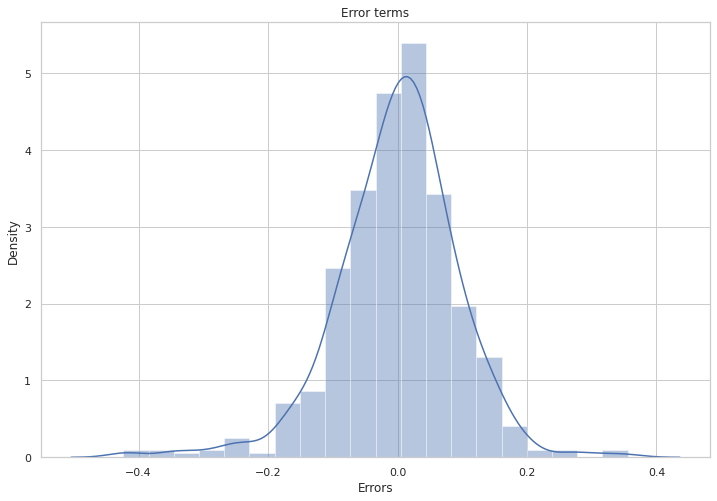

In [155]:
## Distrubition plot for residue

fig = plt.figure(figsize=(12,8))
res = y_train - y_train_pred
sns.distplot(res,bins = 20)
plt.title('Error terms')
plt.xlabel('Errors')
plt.show()

From the above distplot we can see that the error term shows the normal distribution with mean at 0.0

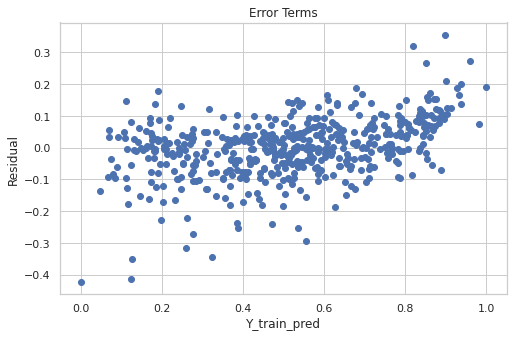

In [169]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
plt.title('Error Terms')               
plt.xlabel('Y_train_pred')                     
plt.ylabel('Residual')   
plt.show()

From the above scatter plot we can see it is reasonably random. Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

### Prediction on test set

In [157]:
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.778767,0.534223,0.149393,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.855132,0.470417,0.231142,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.492359,0.777843,0.443398,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.805661,0.236659,0.449707,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.749249,0.070765,0.682387,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [158]:
## selecting final variables from test dataset
x_test_sm = x_test[var_final]
x_test_sm.head()

,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,holiday
184,0,0.778767,0,0,0,1,0,0,0,1
535,1,0.855132,1,0,0,0,0,0,0,0
299,0,0.492359,0,1,0,1,0,0,0,0
221,0,0.805661,0,0,0,0,1,0,0,0
152,0,0.749249,1,0,0,0,0,0,0,0


#### Now we have to Predict the values


In [159]:
## Adding constant
x_test_sm = sm.add_constant(x_test_sm)
x_test_sm.head()

,const,yr,atemp,summer,winter,Light Snow_Light Rain_Thunderstorm,Mist_Broken Cloudy,Aug,Sep,Tuesday,holiday
184,1.0,0,0.778767,0,0,0,1,0,0,0,1
535,1.0,1,0.855132,1,0,0,0,0,0,0,0
299,1.0,0,0.492359,0,1,0,1,0,0,0,0
221,1.0,0,0.805661,0,0,0,0,1,0,0,0
152,1.0,0,0.749249,1,0,0,0,0,0,0,0


In [160]:
# predict test dataset
y_test_pred = lm_final.predict(x_test_sm)

###  Evaluating the model on test set

In [161]:
## Lets now Get R-Squared for test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.798


In [162]:
## Get the Adj. R-Squared for test dataset
## Formula for Adjusted R Squared = 1 – [((1 – R2) * (n – 1)) / (n – p – 1)]
n= len(x_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(n-1)/(n-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.789


In [163]:
## Mean Squared Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:' ,round(mse,4))

Mean Squared Error: 0.0115


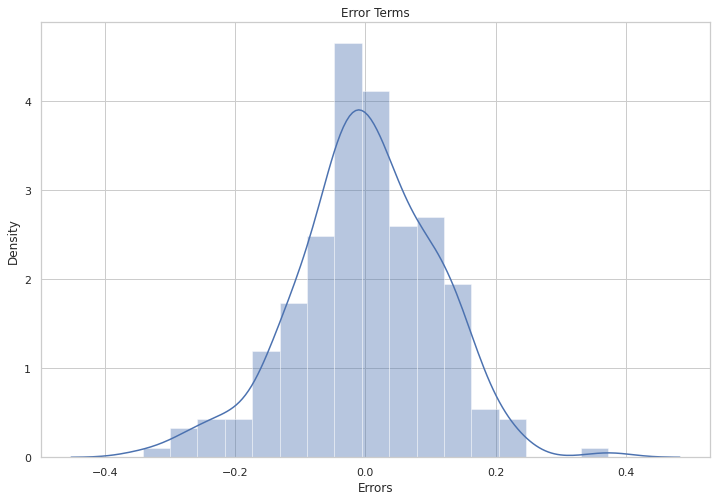

In [164]:
fig = plt.figure(figsize=(12,8))
res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.title('Error Terms') 
plt.xlabel('Errors')
plt.show()

From the above distplot we can see that the error term shows the normal distribution with mean at 0.0

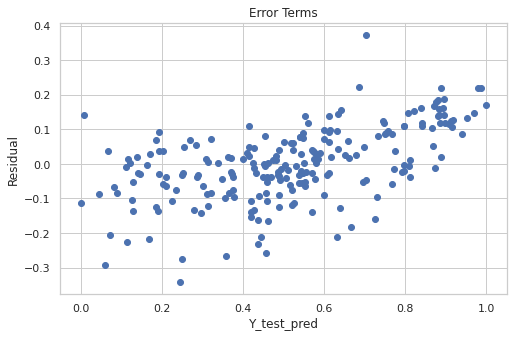

In [168]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
plt.title('Error Terms')              
plt.xlabel('Y_test_pred')                      
plt.ylabel('Residual')   
plt.show()

From the above scatter plot we can see it is reasonably random

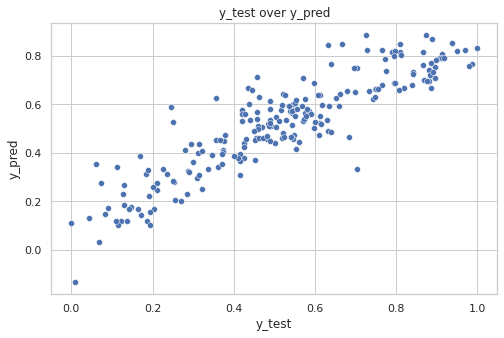

In [165]:
## Checking the predicted values y_pred over test data y_test

fig = plt.figure(figsize=(8,5))
sns.scatterplot(y_test,y_test_pred)
plt.title('y_test over y_pred')        
plt.xlabel('y_test')                         
plt.ylabel('y_pred')   
plt.show()   

#### From the above plot we can see that there is a positive correlation and the model seems good to predict the demand of bikes

In [166]:
## Printing R-Squared and Adj. R-Squared
print('R-Sqaured train: ', round(lm_final.rsquared,3), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R-Sqaured test : ', round(r2_test,3), '  Adj. R-Squared test :', round(r2_test_adj,3))

## Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\n                                    Coefficent'))
print(round(lm_final.params,3))

R-Sqaured train:  0.825   Adj. R-Squared train: 0.822
R-Sqaured test :  0.798   Adj. R-Squared test : 0.789

                                    Coefficent
const                                 0.080
yr                                    0.232
atemp                                 0.562
summer                                0.094
winter                                0.139
Light Snow_Light Rain_Thunderstorm   -0.294
Mist_Broken Cloudy                   -0.083
Aug                                   0.068
Sep                                   0.124
Tuesday                              -0.049
holiday                              -0.104
dtype: float64


We can see that the equation for best fitted line is:

The equation of our best fitted line is:

$ cnt = 0.080 + (0.232  \times  yr) + (0.562  \times  atemp) + (0.094 \times summer) + (0.139 \times winter) - (0.294 \times Light SnowLight RainThunderstorm) - (0.083 \times MistBroken Cloudy) + (0.068 \times Aug) + (0.124 \times Sep) - (0.049 \times Tuesday) - (0.104 \times holiday) $

### Conclusions & Recommendations
Demand will be increasing in the months of Aug, Sep

Demand will be decreasing if it is holiday , Light Snow_Light Rain_Thunderstorm, Mist_Broken Cloudy and Tuesday.

- Based on final model top three features explaining the demand are:
    1. year (0.232)
    2. Feeling Temperature (0.562)
    3. weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.294)

